# Working with Data in Python

**Author:** Alexander Michels

This notebook goes over the basics of working with data and spatial data in Python.

* [Tabular Data with Pandas](#pandas)
* [Spatial Data with Geopandas](#geopandas)
* [Data Operations](#data-ops)

<hr id="pandas" />

# Tabular Data with Pandas

The Pandas package is a popular tool for working with tabular (table-like, think spreadsheets) data in Python. For example, to read a CSV (Comma Separated Values) file, we can use the `read_csv` function:

In [1]:
import pandas as pd
df = pd.read_csv("data/Texas_county.csv")

We can get a preview of the data with the `head` function which displays the first 5 entries in our DataFrame (the pandas name for a table):

In [2]:
df.head()

COUNTY   FIPS                LOCATION    AREA_SQMI  E_TOTPOP   
0  Anderson County  48001  Anderson County, Texas  1062.616344     58077  \
1   Andrews County  48003   Andrews County, Texas  1500.720658     18362   
2  Angelina County  48005  Angelina County, Texas   797.864652     86608   
3   Aransas County  48007   Aransas County, Texas   252.068582     24048   
4    Archer County  48009    Archer County, Texas   903.288792      8649   

   M_TOTPOP  
0         0  
1         0  
2         0  
3         0  
4         0

Just like with ESRI products (e.g., ArcGIS Online), data can have types in Pandas DataFrames. Let's check the types our data was loaded with.

Below we will use a for loop to examine each column `col` in our DataFrame's `columns`. We will use an f-string (which allows us to easily print out variables) to print the name of the column and also the datatypes (`dtypes`) within that column.

In [3]:
for col in df.columns:
    print(f"{col}: {df[col].dtypes}")

COUNTY: object
FIPS: int64
LOCATION: object
AREA_SQMI: float64
E_TOTPOP: int64
M_TOTPOP: int64


Note that our DataFrame loaded the FIPS codes as an `int64`. This means an integer with 64 bits (64 0s or 1s). It will be easier to work with FIPS values as strings:

In [4]:
df["FIPS"] = df["FIPS"].astype(str)  # set the FIPS column in the DataFrame to the FIPS column as the string type

Texas is lucky in that it has the state code `48`, but not all states are as lucky! Some states start with a leading zero and when loaded as an integer, this leading zero can be dropped. However, we can add leading zeroes to a FIPS code using the [pandas pad function](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.pad.html).

We will pad up to 10 characters just to demonstrate the functionality, but note that county FIPS values are 5 digits.

In [5]:
df["test"] = df["FIPS"].str.pad(6, side="left", fillchar="0")  # pad the strings on the left side, up to 5 characters and use "0" to fill in.
df.head()

COUNTY   FIPS                LOCATION    AREA_SQMI  E_TOTPOP   
0  Anderson County  48001  Anderson County, Texas  1062.616344     58077  \
1   Andrews County  48003   Andrews County, Texas  1500.720658     18362   
2  Angelina County  48005  Angelina County, Texas   797.864652     86608   
3   Aransas County  48007   Aransas County, Texas   252.068582     24048   
4    Archer County  48009    Archer County, Texas   903.288792      8649   

   M_TOTPOP    test  
0         0  048001  
1         0  048003  
2         0  048005  
3         0  048007  
4         0  048009

Pandas has some other valuable functionalities, like easily checking if a column is unique ([`is_unique`](https://pandas.pydata.org/docs/reference/api/pandas.Series.is_unique.html)):

In [6]:
df["FIPS"].is_unique

True

<hr id="geopandas" />

## Spatial Data with Geopandas

The geopandas package builds on pandas, with the key difference being that GeoDataFrames have a "geometry" column!

Let's load a sample dataset with Geopandas:

In [7]:
import geopandas as gpd

gdf = gpd.read_file("data/UTD.gpkg")

GeoDataFrames are also DataFrames, so all of the tools we can use with Pandas still apply here! Let's get a preview of the data:

In [8]:
gdf.head()

element_type      osmid                      name    building   
0          way  134921833       Parking Structure 4      garage  \
1          way  221316815   Administration Building  university   
2          way  221317000        Classroom Building  university   
3          way  221317443  Eugene McDermott Library  university   
4          way  221344894                         2  apartments   

                                            geometry  
0  POLYGON ((1802977.859 7656229.698, 1802977.927...  
1  POLYGON ((1803310.634 7656558.280, 1803309.909...  
2  POLYGON ((1803277.536 7656609.044, 1803277.561...  
3  POLYGON ((1803459.732 7656334.511, 1803459.799...  
4  POLYGON ((1802810.950 7656087.852, 1802803.092...

We can use the `is_unique` property as well:

In [9]:
gdf["osmid"].is_unique

True

Because GeoDataFrames have a geometry column, we can plot them! GeoDataFrames have a built-in `plot()` method:

<Axes: >

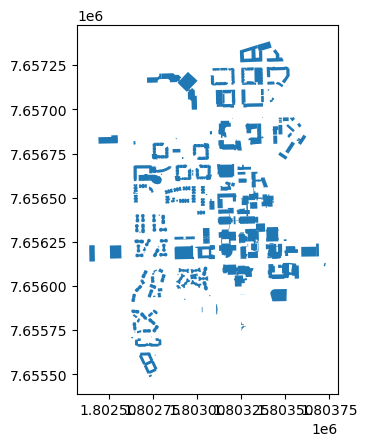

In [10]:
gdf.plot()

The values you see on the x- and y-axis don't appear to make much sense! We can check the Coordinate Reference System (CRS) by checking that propery of the GeoDataFrame:

In [11]:
gdf.crs

<Derived Projected CRS: EPSG:3083>
Name: NAD83 / Texas Centric Albers Equal Area
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: United States (USA) - Texas.
- bounds: (-106.66, 25.83, -93.5, 36.5)
Coordinate Operation:
- name: Texas Centric Albers Equal Area
- method: Albers Equal Area
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

To convert a GeoDataFrame to another CRS, we use the [`to_crs`](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.to_crs.html) method and specify the "Authority String" that specifies the projection we want to use.

The most common projection is the EPSG:4326 one, let's project to that:

In [12]:
gdf = gdf.to_crs("EPSG:4326")

Then we can check our result:

<Axes: >

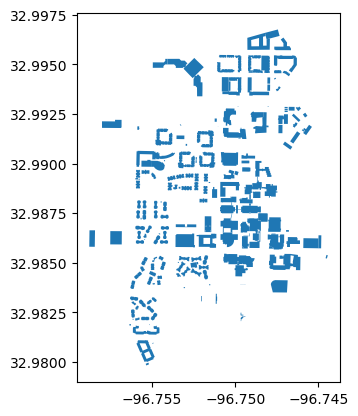

In [13]:
gdf.plot()

GeoDataFrames also have a powerful `explore()` method to create quick interactive maps with basemaps!

In [14]:
gdf.explore()

<hr id="data-ops" />

## Data Operations

Pandas and Geopandas both provide powerful tools for data operations. We have already explored a few including padding values, transforming data types, and converting between CRS.

Here, we will perform some normal and spatial joins! Let's start by loading a GeoPackage of Texas counties.

In [15]:
tx = gpd.read_file("data/TXCounties.gpkg")
tx.head()

FIPS                                           geometry
0  48001  MULTIPOLYGON (((-96.06486 31.98095, -96.06305 ...
1  48003  MULTIPOLYGON (((-103.06470 32.52219, -103.0004...
2  48005  MULTIPOLYGON (((-95.00488 31.42396, -95.00334 ...
3  48007  MULTIPOLYGON (((-97.12560 28.25371, -97.12500 ...
4  48009  MULTIPOLYGON (((-98.95382 33.49637, -98.95377 ...

In [16]:
tx.explore()

Let's use what we learned in the previous sections to join the `df` DataFrame to our `tx` GeoDataFrame!

This is a non-spatial join, so it will use the pandas [merge](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html#pandas.DataFrame.merge) method.

In [17]:
joined_df = tx.merge(df, on="FIPS")
joined_df.head()

FIPS                                           geometry           COUNTY   
0  48001  MULTIPOLYGON (((-96.06486 31.98095, -96.06305 ...  Anderson County  \
1  48003  MULTIPOLYGON (((-103.06470 32.52219, -103.0004...   Andrews County   
2  48005  MULTIPOLYGON (((-95.00488 31.42396, -95.00334 ...  Angelina County   
3  48007  MULTIPOLYGON (((-97.12560 28.25371, -97.12500 ...   Aransas County   
4  48009  MULTIPOLYGON (((-98.95382 33.49637, -98.95377 ...    Archer County   

                 LOCATION    AREA_SQMI  E_TOTPOP  M_TOTPOP    test  
0  Anderson County, Texas  1062.616344     58077         0  048001  
1   Andrews County, Texas  1500.720658     18362         0  048003  
2  Angelina County, Texas   797.864652     86608         0  048005  
3   Aransas County, Texas   252.068582     24048         0  048007  
4    Archer County, Texas   903.288792      8649         0  048009

In [18]:
joined_df.explore(column="E_TOTPOP")

We can also perform spatial joins using the GeoPandas [`sjoin`](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.sjoin.html#geopandas.GeoDataFrame.sjoin) method.

A few important notes:
* The `predicate` defines what kind of spatial join (see the documentation for more info)
* The `geometry` column in the result will be geometry of the GeoDataFrame calling the function. (Feel free to swap tx and gdf to see what I mean!)

In [19]:
intersects = tx.sjoin(gdf, predicate="intersects")
intersects.head()

FIPS                                           geometry  index_right   
42  48085  MULTIPOLYGON (((-96.84410 32.98891, -96.84402 ...          243  \
56  48113  MULTIPOLYGON (((-97.03852 32.56000, -97.03840 ...          243   
42  48085  MULTIPOLYGON (((-96.84410 32.98891, -96.84402 ...          113   
56  48113  MULTIPOLYGON (((-97.03852 32.56000, -97.03840 ...          113   
42  48085  MULTIPOLYGON (((-96.84410 32.98891, -96.84402 ...           13   

   element_type      osmid                                   name    building  
42     relation    8384532  Engineering and Computer Science West  university  
56     relation    8384532  Engineering and Computer Science West  university  
42          way  514361757       Reasearch Operations Center West  university  
56          way  514361757       Reasearch Operations Center West  university  
42          way  221345161         Research and Operations Center  university

In [20]:
intersects.explore()